## basic analysis of mag-comp bauer model

* ....
* model comparison

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os
import arviz as az

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
target_folder = op.join(bids_folder, f'derivatives/cogmodels_magjudge')
params_folder = op.join(bids_folder,'derivatives/phenotype')

sns.set_context('talk')


In [29]:
from utils import get_data

df = get_data(bids_folder)
group_list = df.reset_index().drop_duplicates(subset=['subject', 'group'])[['subject', 'group']].set_index('subject')


number of subjects found: 66
number of subjects in dataframe: 66
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
           dtype='int64', name='subject')


## Model Comparison

In [3]:
target_folder = op.join(bids_folder, f'derivatives/cogmodels_magjudge')

model_1 =  az.from_netcdf(op.join(target_folder, f'model-1_trace.netcdf'))
model_2 =  az.from_netcdf(op.join(target_folder, f'model-2_trace.netcdf'))
model_3 =  az.from_netcdf(op.join(target_folder, f'model-3_trace.netcdf'))
model_4 =  az.from_netcdf(op.join(target_folder, f'model-4_trace.netcdf'))
model_5 =  az.from_netcdf(op.join(target_folder, f'model-5_trace.netcdf'))


In [ ]:
compare_dict = {"model 1": model_1, "model 2": model_2,"model 3": model_3, "model 4": model_4}
compare_dict = {"n1/n2, no fit prior": model_1, "n1/n2, fit prior": model_2,
                "per/mem noise, no fit prior": model_3, "per/mem noise, fit prior": model_4, 
                 "per/mem noise, fit prior, only prior_sd group reg": model_5}

az.compare(compare_dict)

### 

### Get subwise estimates



In [3]:
from utils_02 import get_subwise_params

model_label = 1
idata =  az.from_netcdf(op.join(target_folder, f'model-{model_label}_trace.netcdf'))

sd_mem = get_subwise_params(idata, 'n1_evidence_sd',group_list=group_list)
sd_per = get_subwise_params(idata, 'n2_evidence_sd',group_list=group_list)

sds = pd.concat([sd_mem, sd_per], axis=1)
sds = sds.join(group_list)

#sds.to_csv(op.join(params_folder, f'magjudge_bauer-{model_label}_sds.csv'))

/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


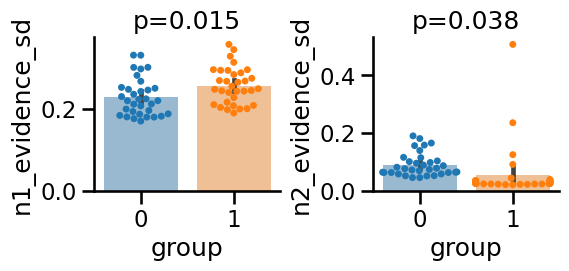

In [60]:
df_param = sds

fig, ax = plt.subplots(1,2, figsize=(6,2))
for i,y_var in enumerate(['n1_evidence_sd', 'n2_evidence_sd']): 
    sns.barplot(ax=ax[i],data=df_param.reset_index(), x='group', y=y_var, hue='group',alpha=0.5)
    sns.swarmplot(ax=ax[i], data=df_param.reset_index(), x='group', y=y_var,  hue='group',size=5)
    an = pg.anova(data=df_param.reset_index(), dv=y_var, between='group')
    p_val = np.round(an['p-unc'][0],3)

    ax[i].set(title=f'p={p_val}') # ylim=(0.,0.4),
    ax[i].legend().remove()
    sns.despine()
plt.subplots_adjust(wspace=0.5)


### ppcs

In [32]:
model.free_parameters

{'n1_evidence_sd': {'mu_intercept': -1.0, 'transform': 'softplus'},
 'n2_evidence_sd': {'mu_intercept': -1.0, 'transform': 'softplus'}}

In [23]:
variable_names = list(idata.posterior.data_vars.keys())
variable_names

['n1_evidence_sd_mu',
 'n1_evidence_sd_offset',
 'n2_evidence_sd_mu',
 'n2_evidence_sd_offset',
 'n1_evidence_sd_sd',
 'n2_evidence_sd_sd',
 'n1_evidence_sd',
 'n2_evidence_sd']

In [31]:
n1 = softplus(idata['posterior']['n1_evidence_sd_mu']).to_dataframe().reset_index('n1_evidence_sd_regressors').rename(mapper={'n1_evidence_sd_regressors':'regressor'}, axis=1)
n1.head()

regressor  n1_evidence_sd_mu
chain draw                              
0     0     Intercept           0.227168
      0         group           0.864315
      1     Intercept           0.223017
      1         group           0.746213
      2     Intercept           0.236774